In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### 1. Import required libraries and read the dataset. (2)

In [2]:
df=pd.read_csv(r"C:\Users\Tanush Sujoy\Downloads\archive\dataset.csv")
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)


In [5]:
#missing values
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [6]:
#drop redundant columns
df.drop(['loan_id'],axis=1, inplace=True)

In [7]:
#handle missing data in numerical categories by replacing values with mean
df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace=True)
df['credit_history'].fillna(df['credit_history'].mean(), inplace=True)

In [8]:
#handle missing data in categorical variables by replacing values with mode
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['married'].fillna(df['married'].mode()[0],inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [10]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,male,yes,0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


 #### Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

In [11]:
cat_features=df.select_dtypes(include=['object'])
cat_features.head(5)

,gender,married,dependents,education,self_employed,property_area,loan_status
0,male,no,0,graduate,no,urban,y
1,male,yes,1,graduate,no,rural,n
2,male,yes,0,graduate,yes,urban,y
3,male,yes,0,not graduate,no,urban,y
4,male,no,0,graduate,no,urban,y


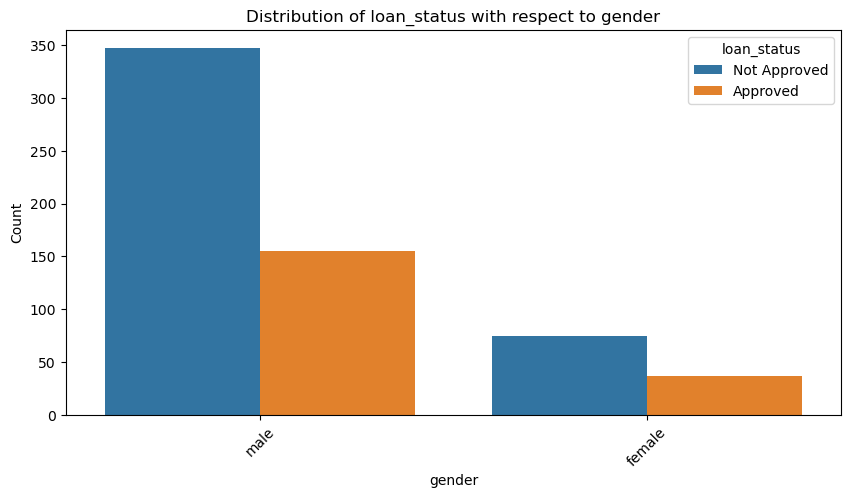

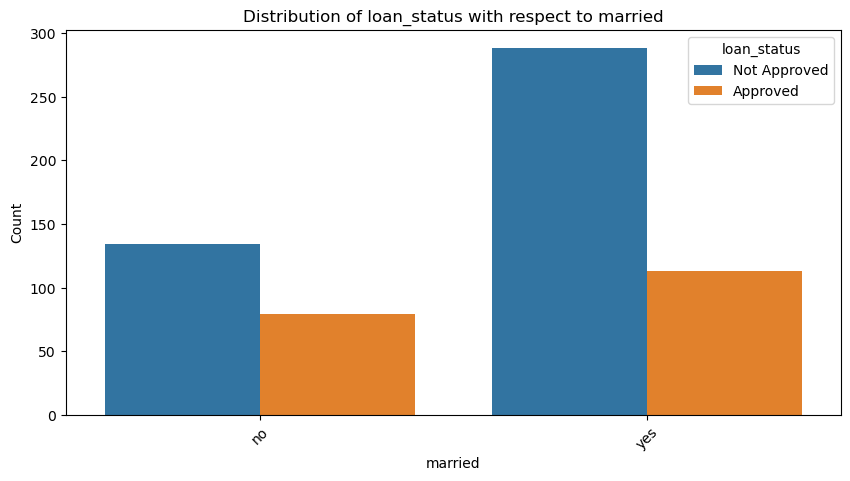

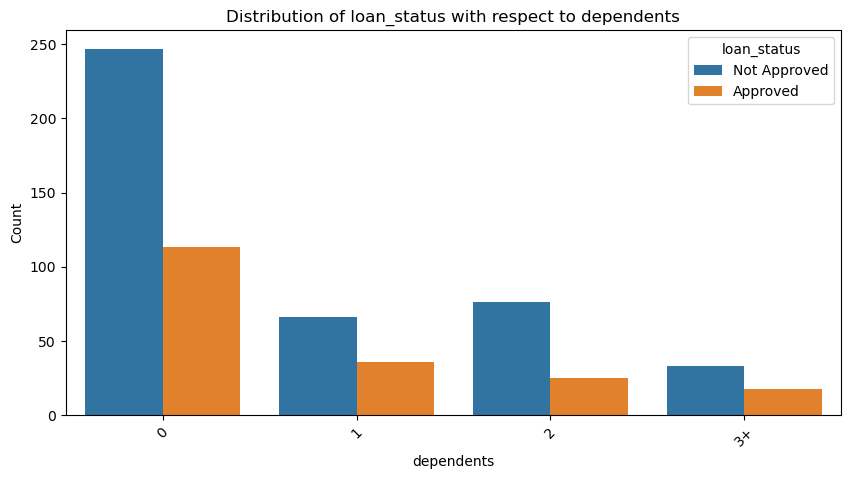

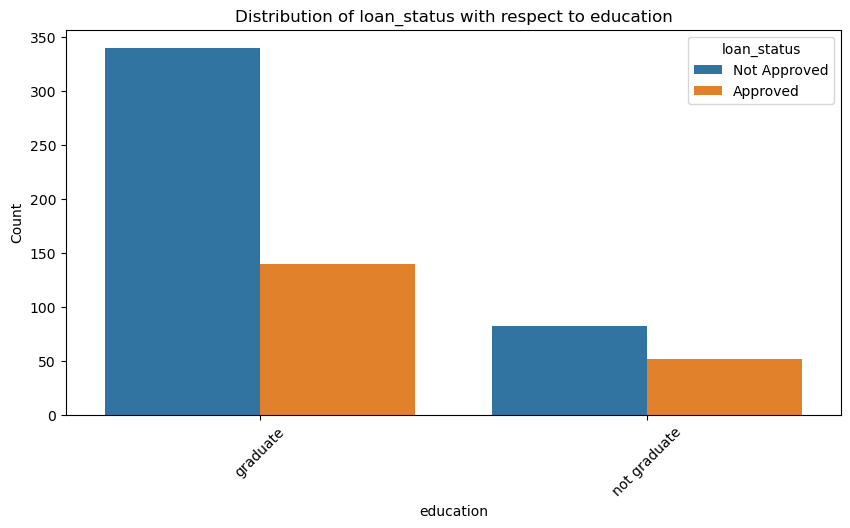

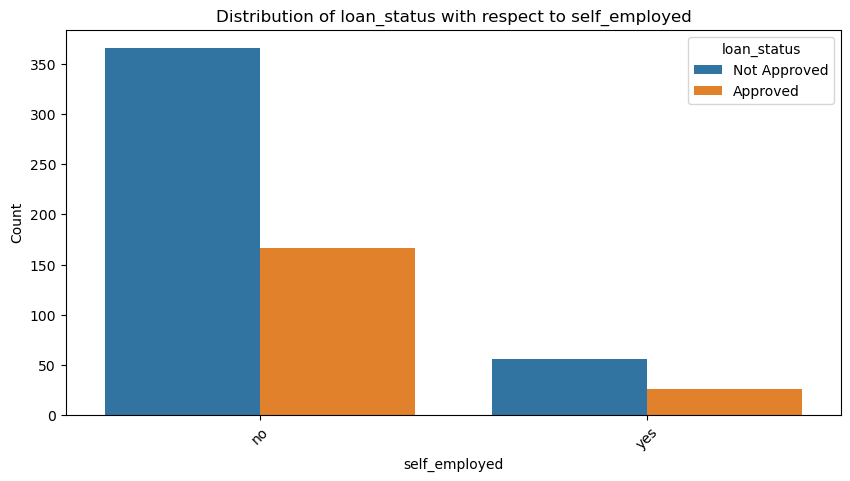

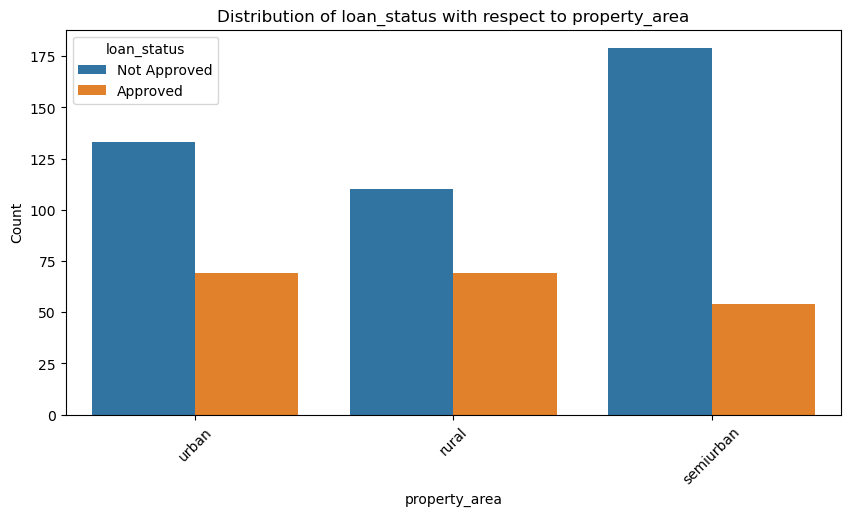

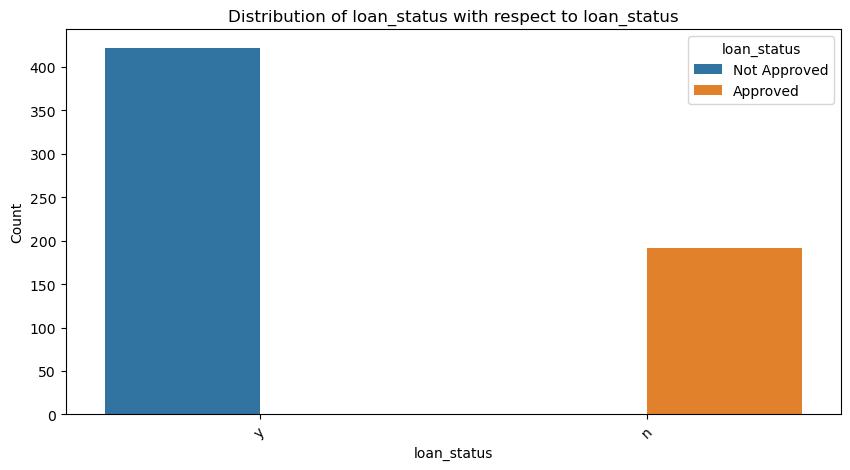

In [12]:
for feature in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature,hue='loan_status',data=df)
    plt.title(f'Distribution of loan_status with respect to {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='loan_status', labels=['Not Approved', 'Approved'])
    plt.show()

### 1.As  per the distribution plot showing loan_status with respect to gender males had a higher approval rate.
### 2. Loan status approved is higher in unmarried vs the married
### 3.Loan status approved is higher in 0 dependents compared to other categories
### 4.Graduates had higher approval of loans than undergraduates
### 5. Intrestingly people who weren't self employed had a higher approval rate. Maybe they are working professionals.
### 6.The difference in dispersal of loans to people in urban,rural and semi urban areas aren't strikingly divergent





### 5. Encode the categorical data. (2)

In [50]:
df['gender']=df['gender'].replace({'male':0, 'female':1})
df['married']=df['married'].replace({'yes':0,'no':1})
df['dependents']=df['dependents'].replace({'0':0,'1':1,'2':2,'3+':3}).astype(int)
df['education']=df['education'].replace({'graduate':0,'not graduate':1})
df['self_employed']=df['self_employed'].replace({'yes':0,'no':1})
df['property_area']=df['property_area'].replace({'urban':0,'semiurban':1,'rural':2})
df['loan_status']=df['loan_status'].replace({'y':0,'n':1})

In [51]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,0,0
1,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,2,1
2,0,0,0,0,0,3000,0.0,66.000000,360.0,1.0,0,0
3,0,0,0,1,1,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,1,0,0,1,6000,0.0,141.000000,360.0,1.0,0,0


In [52]:
df.shape

(614, 12)

### 6. Separate the target and independent features and split the data into train and test. (2)


In [53]:
##separate independent and target variable
X=df.drop('loan_status',axis=1)#all columns except loan status
Y=df['loan_status']#target variable

#split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [54]:
#scaling the data
ss=StandardScaler()

X_train=ss.fit_transform(X_train.iloc[:,:])
X_test=ss.transform(X_test.iloc[:,:])

In [55]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
accuracy = model.score(X_test, Y_test)
print(f'Model Accuracy test:',accuracy)
accuracy_train=model.score(X_train,Y_train)
print(f'Model accuracy train:',accuracy_train)

Model Accuracy test: 0.7837837837837838
Model accuracy train: 0.8251748251748252


### The model is 82.52% accurate in testing and 78.37% accurate in training data.

### Pickling-Creating a pickle file with extension as .pkl

In [58]:
import pickle
# Saving model to disk
pickle.dump(model, open('model1.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model1.pkl','rb'))